In [38]:
import pandas as pd

In [39]:
df = pd.read_json('newsdata.json', lines = True)

In [40]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [41]:
df = df.head(30000)

In [42]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
29995,https://www.huffingtonpost.com/entry/moms-the-...,Moms: The B*tchiest Bullies Of Social Media,QUEER VOICES,"*Trigger Warning: Transphobia* Recently, Scary...","Martie Sirois, ContributorTGNC advocate, found...",2017-07-17
29996,https://www.huffingtonpost.com/entry/caitlyn-j...,Caitlyn Jenner Is Talking About Running For Of...,QUEER VOICES,The Olympian and reality star says she’s inter...,Elyse Wanshel,2017-07-17
29997,https://www.huffingtonpost.com/entry/how-to-wa...,How To Watch Shark Week Without A Cable Subscr...,ENTERTAINMENT,Live every week like you don't have an actual ...,Jillian Capewell,2017-07-17
29998,https://www.huffingtonpost.com/entry/baseball-...,Baseball Is Broken: Only I Know How To Fix It,SPORTS,Even Springsteen stops the show after three ho...,"Joe Raiola, ContributorSenior Editor, MAD Maga...",2017-07-17


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   link               30000 non-null  object        
 1   headline           30000 non-null  object        
 2   category           30000 non-null  object        
 3   short_description  30000 non-null  object        
 4   authors            30000 non-null  object        
 5   date               30000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 1.4+ MB


In [44]:
# Put this in a notebook cell
import pandas as pd
import numpy as np
from datetime import datetime
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import jensenshannon
import ruptures as rpt
import matplotlib.pyplot as plt

# 1) Prepare text + parse date
df['date'] = pd.to_datetime(df['date'])
# combine short text fields; drop NaNs
df['text'] = (df['headline'].fillna('') + '. ' + df['short_description'].fillna('')).str.strip()
df = df[df['text'].str.len() > 10].reset_index(drop=True)

# 2) choose bins (example: monthly)
df['time_bin'] = df['date'].dt.to_period('M').dt.to_timestamp()

# 3) embeddings
embed_model = SentenceTransformer("all-MiniLM-L6-v2")   # small & fast
embeddings = embed_model.encode(df['text'].tolist(), show_progress_bar=True, convert_to_numpy=True)

# 4) fit BERTopic
topic_model = BERTopic(embedding_model=embed_model, verbose=True)
topics, probs = topic_model.fit_transform(df['text'].tolist(), embeddings)  # topics: topic id per doc



# attach to df
df['topic'] = topics
df['topic_prob'] = [p.max() if p is not None else 0 for p in probs]  # optional

# ---- TOPIC INTERPRETATION BLOCK (ADD THIS) ----
topic_info = topic_model.get_topic_info()        # summary table
all_topics = topic_info[topic_info['Topic'] >= 0]['Topic'].tolist()

topic_meanings = {}
for t in all_topics:
    words = topic_model.get_topic(t)
    meaning = ", ".join([w[0] for w in words[:5]])  # top 5 words
    topic_meanings[t] = meaning

# merge meanings into your dataframe
df['topic_meaning'] = df['topic'].map(topic_meanings)

# print example
print(topic_info.head())
print(df[['text', 'topic', 'topic_meaning']].head())
# -----------------------------------------------


# 5) topics over time (BERTopic helper)
topics_over_time = topic_model.topics_over_time(df['text'].tolist(), df['time_bin'].tolist(), topics=topics, nr_bins=None)
# topics_over_time is a DataFrame with columns: Topic, Timestamp, Frequency, Term (topic words)...






Batches: 100%|██████████| 938/938 [02:35<00:00,  6.02it/s]
2025-12-05 15:48:50,700 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-05 15:48:59,020 - BERTopic - Dimensionality - Completed ✓
2025-12-05 15:48:59,023 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-05 15:49:05,615 - BERTopic - Cluster - Completed ✓
2025-12-05 15:49:05,625 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-05 15:49:07,127 - BERTopic - Representation - Completed ✓


   Topic  Count                            Name  \
0     -1  11725                -1_of_the_to_and   
1      0    444  0_police_shooting_shot_officer   
2      1    409  1_obamacare_care_health_repeal   
3      2    374       2_korea_north_korean_jong   
4      3    309  3_olympics_olympic_winter_gold   

                                      Representation  \
0    [of, the, to, and, in, is, for, trump, it, her]   
1  [police, shooting, shot, officer, man, suspect...   
2  [obamacare, care, health, repeal, insurance, m...   
3  [korea, north, korean, jong, kim, un, nuclear,...   
4  [olympics, olympic, winter, gold, medal, team,...   

                                 Representative_Docs  
0  [Being Gay: How Books And Reading Saved My Lif...  
1  [19-Year-Old Arrested After Parents Found Shot...  
2  [Donald Trump Says Senate Let America Down Wit...  
3  [South Korea Has Most At Stake In North Korea ...  
4  [Athletes To Watch At The 2018 Winter Olympics...  
                          

63it [00:18,  3.48it/s]


In [45]:
# 6) compute normalized topic distribution per time bin
# pivot to matrix: rows=time bins, cols=topic ids, values = frequencies (or normalized frequency)
pivot = topics_over_time.pivot_table(index='Timestamp', columns='Topic', values='Frequency', aggfunc='sum', fill_value=0)
pivot = pivot.div(pivot.sum(axis=1), axis=0).fillna(0)  # make each row a probability distribution

# 7) compute Jensen-Shannon distances between consecutive bins
jsd = []
times = pivot.index.to_list()
for i in range(1, len(pivot)):
    p = pivot.iloc[i-1].values
    q = pivot.iloc[i].values
    # add tiny eps to avoid zeros if necessary
    d = jensenshannon(p + 1e-12, q + 1e-12)
    jsd.append(d)

# 8) detect change points in the JSD time series
if len(jsd) >= 3:
    algo = rpt.Pelt(model="rbf").fit(np.array(jsd))
    # penalty choice depends on data; adjust or use number of changes
    change_idxs = algo.predict(pen=1.0)  # returns indexes where change points occur (1-based)
else:
    change_idxs = []

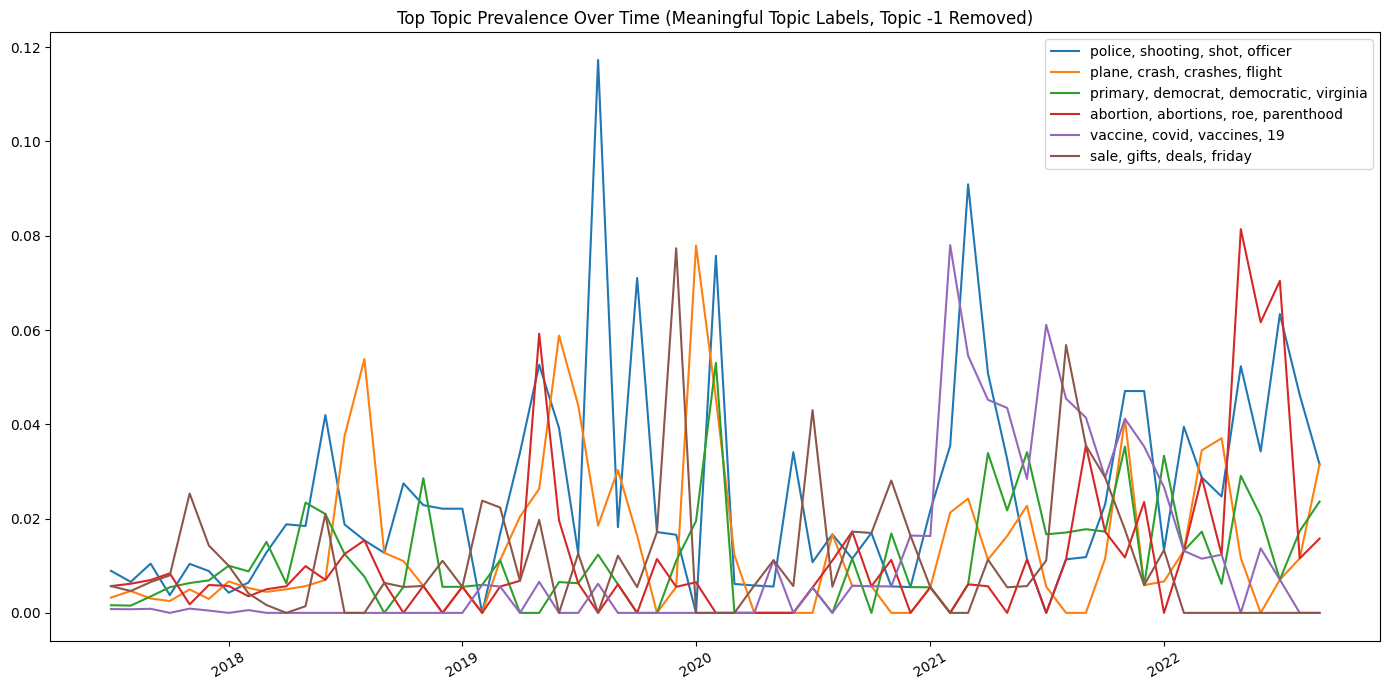

'\n# ---- Plot JSD Drift + Detected Change Points ----\nplt.figure(figsize=(14, 3))\nplt.plot(times[1:], jsd, marker=\'o\')\n\n# Mark change points\nfor ci in change_idxs:\n    if ci < len(times):\n        plt.axvline(times[ci], color=\'red\', linestyle=\'--\', alpha=0.6)\n\nplt.title("Jensen–Shannon Distance Drift (Topic Distribution Changes)")\nplt.xticks(rotation=30)\nplt.tight_layout()\nplt.show()\n'

In [ ]:
# ---- 9) Plot: Top-K Topic Prevalence Over Time WITH Meaningful Labels (Topic -1 Removed) ----

# Build topic → meaning dictionary
topic_info = topic_model.get_topic_info()
# Only include real topics (Topic >= 0)
valid_topics = topic_info[topic_info['Topic'] >= 0]['Topic'].tolist()

topic_meanings = {}
for t in valid_topics:
    words = topic_model.get_topic(t)
    meaning = ", ".join([w[0] for w in words[:4]])  # top 4 words
    topic_meanings[t] = meaning

# Remove Topic -1 from pivot if it exists
pivot_filtered = pivot.drop(columns=[-1], errors='ignore')

# Select top-K topics from filtered pivot
topk = 6
top_topics = pivot_filtered.sum().sort_values(ascending=False).head(topk).index.tolist()

# Plot topic prevalence
plt.figure(figsize=(14, 7))
for t in top_topics:
    label = topic_meanings.get(t, f"Topic {t}")
    plt.plot(pivot_filtered.index, pivot_filtered[t], label=label)

plt.legend()
plt.title("Top Topic Prevalence Over Time (Meaningful Topic Labels, Topic -1 Removed)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

